<a href="https://colab.research.google.com/github/kalamcreation/Machine_Learning/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

**Data Collection and Processing**

In [3]:
# loading the csv data to a Pandas DataFrame
data=pd.read_csv('/content/drive/MyDrive/AI/Python Files/Loan Approval Prediction Dataset/loan_approval_dataset.csv')

In [4]:
# print first 5 rows of the dataset
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**Shape of Dataset**

In [5]:
# number of rows and columns in the dataset
rows, cols = data.shape
print(f'There are {rows} rows and {cols} columns in dataset')

There are 2199 rows and 13 columns in dataset


**Duplicate Data**

In [6]:
print(f"There are {data.duplicated().sum()} duplicates data")
data.loc[data.duplicated(keep=False)].sort_values(by=data.columns.to_list())

There are 0 duplicates data


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [7]:
#data.drop_duplicates(inplace=True)

**Information About Dataset**

In [8]:
# getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    2199 non-null   int64 
 1    no_of_dependents          2199 non-null   int64 
 2    education                 2199 non-null   object
 3    self_employed             2199 non-null   object
 4    income_annum              2199 non-null   int64 
 5    loan_amount               2199 non-null   int64 
 6    loan_term                 2199 non-null   int64 
 7    cibil_score               2199 non-null   int64 
 8    residential_assets_value  2199 non-null   int64 
 9    commercial_assets_value   2199 non-null   int64 
 10   luxury_assets_value       2199 non-null   int64 
 11   bank_asset_value          2199 non-null   int64 
 12   loan_status               2199 non-null   object
dtypes: int64(10), object(3)
memory usage: 223.5+ KB


In [9]:
data[' loan_status'].value_counts()

 Approved    1352
 Rejected     847
Name:  loan_status, dtype: int64

**Replace Simillar Values to Unique Values**

In [10]:
#df['CLASS'] = df['CLASS'].str.replace("N ","N")
#df['CLASS'] = df['CLASS'].str.replace("Y ","Y")
#df['Gender'] = df['Gender'].str.replace("f","F")

In [11]:
#now check the unique value of gender
#df['Gender'].unique()
#df['Gender'].value_counts()

In [12]:
#now check the unique value of gender
#df['CLASS'].unique()
#df['CLASS'].value_counts()

In [13]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,2199.000000,2199.000000,2.199000e+03,2.199000e+03,2199.000000,2199.000000,2.199000e+03,2.199000e+03,2.199000e+03,2.199000e+03
mean,1100.000000,2.470668,5.025284e+06,1.503220e+07,10.862210,596.513415,7.382992e+06,4.893224e+06,1.512879e+07,4.914325e+06
std,634.940942,1.686247,2.814289e+06,9.104408e+06,5.734387,172.704225,6.475367e+06,4.384807e+06,9.150252e+06,3.253635e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,550.500000,1.000000,2.600000e+06,7.600000e+06,6.000000,448.000000,2.100000e+06,1.300000e+06,7.400000e+06,2.300000e+06
50%,1100.000000,2.000000,4.900000e+06,1.430000e+07,10.000000,596.000000,5.400000e+06,3.600000e+06,1.450000e+07,4.500000e+06
75%,1649.500000,4.000000,7.500000e+06,2.130000e+07,16.000000,742.500000,1.120000e+07,7.500000e+06,2.180000e+07,6.900000e+06
max,2199.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.870000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [14]:
#data.describe().transpose()

In [15]:
data.describe(include='object')

,education,self_employed,loan_status
count,2199,2199,2199
unique,2,2,2
top,Not Graduate,No,Approved
freq,1101,1105,1352


In [16]:
specific_rows=data.iloc[[2,8,10]]
specific_rows

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
10,11,4,Graduate,Yes,2900000,11200000,2,547,8100000,4700000,9500000,3100000,Approved


  **Remove Null Values**  

<Axes: >

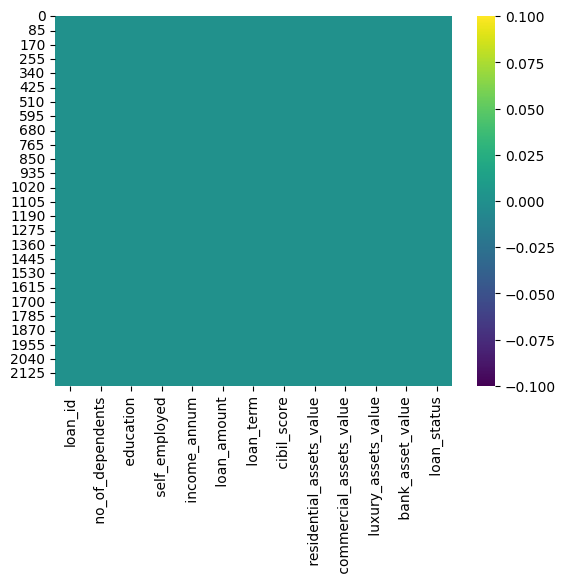

In [17]:
sns.heatmap(data.isnull(),cmap='viridis')

In [18]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

**Let check chances of getting loan approved if you are self-employeed.**

In [19]:
df = data[data[" self_employed"]==" Yes"]
count1,_= df.shape

In [20]:
count2,_ = df[df[" loan_status"]==" Approved"].shape

**Ratio or Probability of getting approved your loan if you are self-employeed :**

In [21]:
print(f"Probability of getting approved your loan if you are self-employed:{count2/count1}")

Probability of getting approved your loan if you are self-employed:0.6179159049360147


<Axes: xlabel=' loan_status', ylabel='count'>

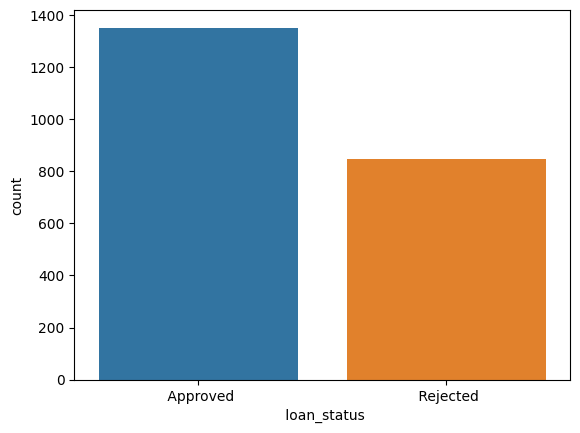

In [22]:
sns.countplot(x =' loan_status', data=data)

In [23]:
categorical_col=[' education',' self_employed']
numerical_col=list(set(data.columns)-set([' loan_status'])-set(categorical_col))
numerical_col

[' residential_assets_value',
 ' loan_term',
 ' loan_amount',
 ' no_of_dependents',
 ' income_annum',
 ' luxury_assets_value',
 'loan_id',
 ' commercial_assets_value',
 ' bank_asset_value',
 ' cibil_score']

**Level Encoder**

In [24]:
import seaborn as sns

In [25]:
# Encode labels in column 'species'.
data[' education']= label_encoder.fit_transform(data[' education'])
data[' self_employed']= label_encoder.fit_transform(data[' self_employed'])
data[' loan_status']= label_encoder.fit_transform(data[' loan_status'])

data[' education'].unique()
data[' self_employed'].unique()
data[' loan_status'].unique()

array([0, 1])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    2199 non-null   int64
 1    no_of_dependents          2199 non-null   int64
 2    education                 2199 non-null   int64
 3    self_employed             2199 non-null   int64
 4    income_annum              2199 non-null   int64
 5    loan_amount               2199 non-null   int64
 6    loan_term                 2199 non-null   int64
 7    cibil_score               2199 non-null   int64
 8    residential_assets_value  2199 non-null   int64
 9    commercial_assets_value   2199 non-null   int64
 10   luxury_assets_value       2199 non-null   int64
 11   bank_asset_value          2199 non-null   int64
 12   loan_status               2199 non-null   int64
dtypes: int64(13)
memory usage: 223.5 KB


**Feature Engineering**

In [27]:
data[' loan_status'].value_counts()

0    1352
1     847
Name:  loan_status, dtype: int64

In [28]:
pip install featurewiz

In [29]:
pip install featurewiz

In [30]:
from featurewiz import featurewiz

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (2199, 13)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S

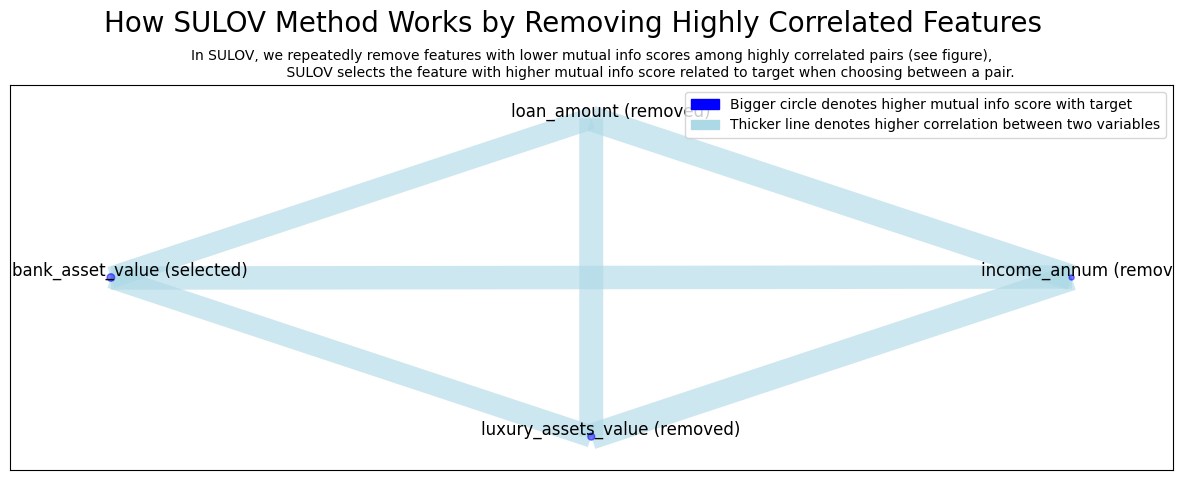

Time taken for SULOV method = 0 seconds
    Adding 0 categorical variables to reduced numeric variables  of 8
Final list of selected 8 vars after SULOV = ['no_of_dependents', 'education', 'self_employed', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'bank_asset_value']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 2 features per iteration...
    XGBoost version using 1.7.6 as tree method: gpu_hist
    Number of booster rounds = 100
        Selected: ['cibil_score', 'loan_term']
            Time taken for regular XGBoost feature selection = 0 seconds
        Selected: ['cibil_score', 'loan_term']
            Time taken for regular X

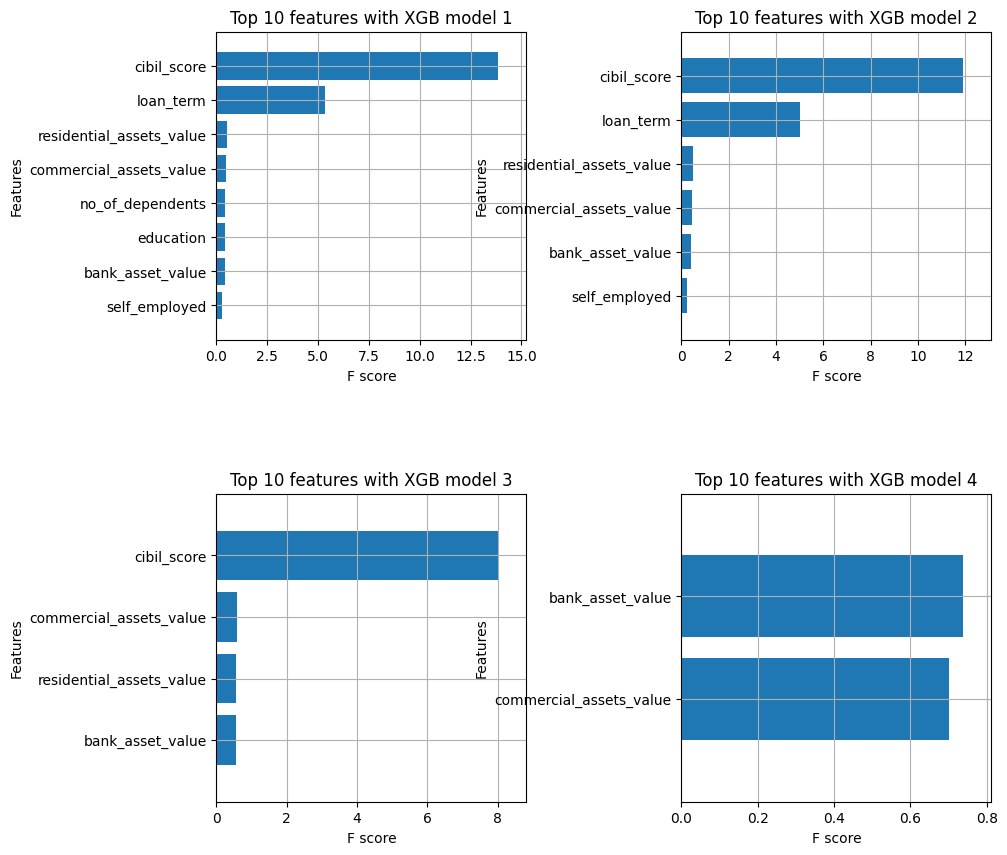

    Completed XGBoost feature selection in 1 seconds
    Alert: No ID variables ['loan_id'] are included in selected features
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 5 important features:
['cibil_score', 'loan_term', 'residential_assets_value', 'commercial_assets_value', 'bank_asset_value']
Total Time taken for featurewiz selection = 2 seconds
Output contains a list of 5 important features and a train dataframe


In [31]:
target = ' loan_status'

features= featurewiz(data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

**Splitting the Features and Target**

In [32]:
#print(features)

In [33]:
x = data.drop(columns=' loan_status', axis=1)
y = data[' loan_status']

In [34]:
print(x)

      loan_id   no_of_dependents   education   self_employed   income_annum  \
0           1                  2           0               0        9600000   
1           2                  0           1               1        4100000   
2           3                  3           0               0        9100000   
3           4                  3           0               0        8200000   
4           5                  5           1               1        9800000   
...       ...                ...         ...             ...            ...   
2194     2195                  3           1               0        5700000   
2195     2196                  5           0               0        6300000   
2196     2197                  5           1               1        2300000   
2197     2198                  4           0               1        9600000   
2198     2199                  1           1               1        1000000   

       loan_amount   loan_term   cibil_score   resi

In [35]:
print(y)

0       0
1       1
2       1
3       1
4       1
       ..
2194    1
2195    1
2196    0
2197    1
2198    1
Name:  loan_status, Length: 2199, dtype: int64


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size = 0.2,  random_state=0)


In [37]:
print(x.shape, x_train.shape, x_test.shape)

(2199, 12) (1759, 12) (440, 12)


**Model Deploy**

In [38]:
#Random Forest
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train.ravel())
predictions = rf1.predict(x_test)

print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))


#Decison Tree
DT1 = DecisionTreeClassifier()
DT1.fit(x_train, y_train.ravel())
predictions1 = DT1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))


# XGB classifier machine object
XGB1 = XGBClassifier()
# train the model on train set
XGB1.fit(x_train, y_train.ravel())
predictions2 = XGB1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))


# KNN classifier machine object
KNN1 =  KNeighborsClassifier()
# train the model on train set
KNN1.fit(x_train, y_train.ravel())
predictions3 = KNN1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       274
           1       0.96      0.97      0.96       166

    accuracy                           0.97       440
   macro avg       0.97      0.97      0.97       440
weighted avg       0.97      0.97      0.97       440

mse= 0.02727272727272727
msle= 0.013103264015950945
mae= 0.02727272727272727
rmse= 0.1651445647689541
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       274
           1       0.97      0.96      0.96       166

    accuracy                           0.97       440
   macro avg       0.97      0.97      0.97       440
weighted avg       0.97      0.97      0.97       440

mse= 0.02727272727272727
msle= 0.013103264015950945
mae= 0.02727272727272727
rmse= 0.1651445647689541
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       274
           1       0.97      0.97

**Balanced Dataset**

In [39]:
pip install imblearn

In [40]:
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm_over = SMOTE(random_state = 2)

x_train_res, y_train_res = sm_over.fit_resample(x_train, y_train.ravel())

In [41]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))



print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train== 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (2156, 12)
After OverSampling, the shape of train_y: (2156,) 

Before OverSampling, counts of label '1': 681
Before OverSampling, counts of label '0': 1078
After OverSampling, counts of label '1': 1078
After OverSampling, counts of label '0': 1078


**Model Deploy after Balance Dataset**

In [42]:
#Random Forest
rf = RandomForestClassifier(random_state=100)
rf.fit(x_train_res, y_train_res.ravel())
predictions = rf.predict(x_test)
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))


#Decison Tree
DT = DecisionTreeClassifier()
DT.fit(x_train_res, y_train_res.ravel())
predictions1 = DT.predict(x_test)
# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))





# XGB classifier machine object
XGB = XGBClassifier()
# train the model on train set
XGB.fit(x_train_res, y_train_res.ravel())
predictions2 = XGB.predict(x_test)
# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))


# KNN classifier machine object
KNN =  KNeighborsClassifier()
# train the model on train set
KNN.fit(x_train_res, y_train_res.ravel())
predictions3 = KNN.predict(x_test)
# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       274
           1       0.94      0.98      0.96       166

    accuracy                           0.97       440
   macro avg       0.96      0.97      0.97       440
weighted avg       0.97      0.97      0.97       440

mse= 0.031818181818181815
msle= 0.01528714135194277
mae= 0.031818181818181815
rmse= 0.17837651700316892
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       274
           1       0.96      0.96      0.96       166

    accuracy                           0.97       440
   macro avg       0.97      0.97      0.97       440
weighted avg       0.97      0.97      0.97       440

mse= 0.029545454545454545
msle= 0.014195202683946856
mae= 0.029545454545454545
rmse= 0.17188791273808215
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       274
           1       0.98     

**UnderSampling Using Near Miss**

In [43]:
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

x_train_miss, y_train_miss = nr.fit_resample(x_train, y_train.ravel())

In [44]:
#NEAR MISS RESULT
print('After UnderSampling, the shape of train_x: {}'.format(x_train_miss.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

print("After UnderSampling, counts of label '2': {}".format(sum(y_train_miss == 2)))
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After UnderSampling, the shape of train_x: (1362, 12)
After UnderSampling, the shape of train_y: (1362,) 

After UnderSampling, counts of label '2': 0
After UnderSampling, counts of label '1': 681
After UnderSampling, counts of label '0': 681


**Model Deploy After UnderSampling**

In [45]:
#Random Forest
rf2 = RandomForestClassifier(random_state=100)
rf2.fit(x_train_miss, y_train_miss.ravel())
predictions = rf2.predict(x_test)
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))


#Decison Tree
DT2 = DecisionTreeClassifier()
DT2.fit(x_train_miss, y_train_miss.ravel())
predictions1 = DT2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))





# XGB classifier machine object
XGB2 = XGBClassifier()
# train the model on train set
XGB2.fit(x_train_miss, y_train_miss.ravel())
predictions2 = XGB2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))



# KNN classifier machine object
KNN2 =  KNeighborsClassifier()
# train the model on train set
KNN2.fit(x_train_miss, y_train_miss.ravel())
predictions3 = KNN2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       274
           1       0.90      0.98      0.94       166

    accuracy                           0.95       440
   macro avg       0.94      0.96      0.95       440
weighted avg       0.96      0.95      0.95       440

mse= 0.04772727272727273
msle= 0.022930712027914156
mae= 0.04772727272727273
rmse= 0.21846572437632575
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       274
           1       0.92      0.96      0.94       166

    accuracy                           0.95       440
   macro avg       0.95      0.96      0.95       440
weighted avg       0.96      0.95      0.95       440

mse= 0.045454545454545456
msle= 0.021838773359918243
mae= 0.045454545454545456
rmse= 0.21320071635561044
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       274
           1       0.92      

**Visualization**

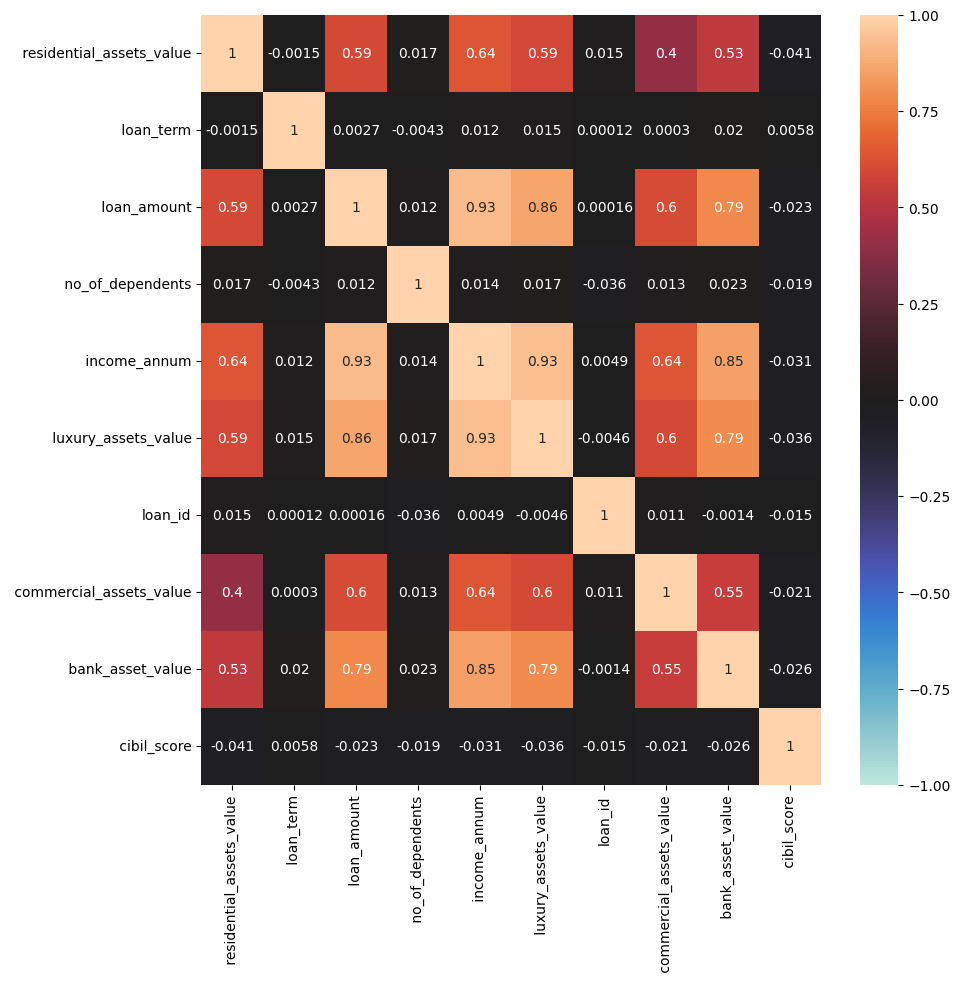

In [46]:
corr=data[numerical_col].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmin=-1,center=0,vmax=1,annot=True)
plt.show()

In [47]:
correlation_matrix = df.corr(method='pearson')

correlation_matrix

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,-0.032127,0.010639,-0.015661,-0.037296,-0.001919,0.012613,-0.013629,0.004389,0.009695
no_of_dependents,-0.032127,1.000000,0.020730,0.018332,-0.023115,-0.037767,-0.002194,0.046155,0.026042,0.021189
income_annum,0.010639,0.020730,1.000000,0.931797,0.021262,-0.031199,0.625023,0.635222,0.932128,0.844059
loan_amount,-0.015661,0.018332,0.931797,1.000000,0.004973,-0.020372,0.585991,0.597752,0.865184,0.792574
loan_term,-0.037296,-0.023115,0.021262,0.004973,1.000000,0.026777,0.021189,0.012496,0.026512,0.019431
cibil_score,-0.001919,-0.037767,-0.031199,-0.020372,0.026777,1.000000,-0.046301,-0.025935,-0.050580,-0.026724
residential_assets_value,0.012613,-0.002194,0.625023,0.585991,0.021189,-0.046301,1.000000,0.377768,0.567053,0.552597
commercial_assets_value,-0.013629,0.046155,0.635222,0.597752,0.012496,-0.025935,0.377768,1.000000,0.609511,0.564615
luxury_assets_value,0.004389,0.026042,0.932128,0.865184,0.026512,-0.050580,0.567053,0.609511,1.000000,0.784578
bank_asset_value,0.009695,0.021189,0.844059,0.792574,0.019431,-0.026724,0.552597,0.564615,0.784578,1.000000


              precision    recall  f1-score   support

           0       0.99      0.93      0.96       274
           1       0.90      0.98      0.94       166

    accuracy                           0.95       440
   macro avg       0.94      0.96      0.95       440
weighted avg       0.96      0.95      0.95       440

Accuracy= 0.9522727272727273
precision= 0.9005524861878453
recall= 0.9819277108433735
f1= 0.9394812680115274


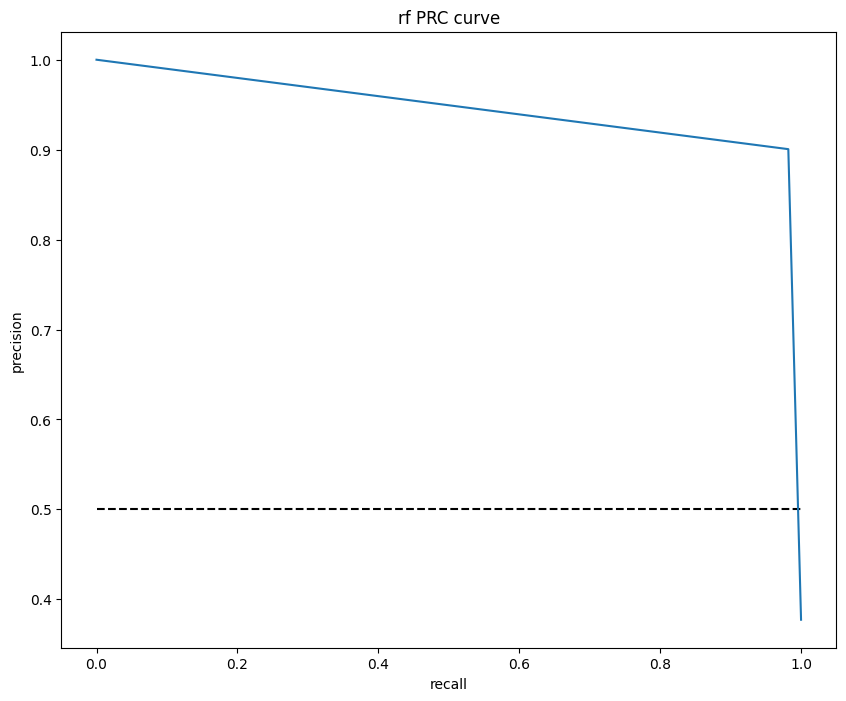

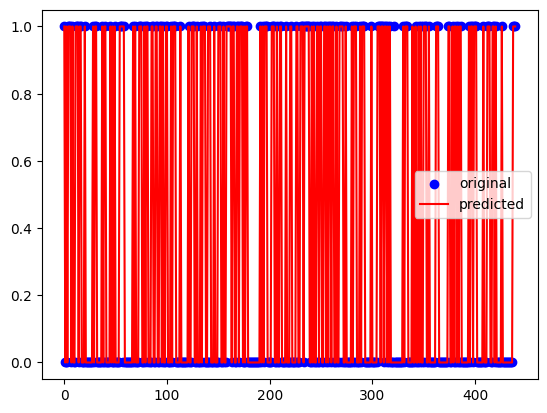

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

#Random Forest
rf2 = RandomForestClassifier(random_state=100)
rf2.fit(x_train_miss, y_train_miss.ravel())
predictions4 = rf2.predict(x_test)
print(classification_report(y_test, predictions4))


# support vector machine object
#svm = SVC(kernel='linear')
# train the model on train set
#svm.fit(x_train_res, y_train_res.ravel())
#predictions4 = svm.predict(x_test)
# print classification report
#print(classification_report(y_test, predictions4))


Accuracy=accuracy_score(y_test, predictions4)
precision=precision_score(y_test, predictions4)
recall=recall_score(y_test, predictions4)
f1=f1_score(y_test, predictions4)
print('Accuracy=',Accuracy)
print('precision=',precision)
print('recall=',recall)
print('f1=',f1)

precision, recall, thresholds = precision_recall_curve(y_test, predictions4)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'svm')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('rf PRC curve')
plt.show()



y = y_test
yhat = predictions4
x = list(range(len(y)))

plt.scatter(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show()

**Model Evaluation**

In [49]:
pip install lime

In [50]:
#After Domain Expert Opinion, FeatureWIZ, FilterBased (Chi-Squared) and WrapperBased  Method = Selected Features.
featuresfinal=['loan_id',	'no_of_dependents',	'education',	'self_employed',	'income_annum',	'loan_amount',	'loan_term',	'cibil_score',	'residential_assets_value',	'commercial_assets_value',	'luxury_assets_value',	'bank_asset_value',	'loan_status']

In [51]:
features_for_lime=featuresfinal

In [52]:
#import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=features_for_lime,
    class_names=['0', '1', '2'],
    mode='classification'
)

**Let's check the average Cibil score to approve the loan.**

In [53]:
df = data[data[" loan_status"]=="Approved"]
print(f"Average cibil score :{df[' cibil_score'].mean()}")

Average cibil score :nan


**So the average cibil score should be around 703.**

In [54]:
numcol = []
for col in data.columns:
    if data[col].dtypes == "int64":
        numcol.append(col)

print(numcol)

['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [55]:
input_data = (62,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf1.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('Loan Approved')
else:
  print('Loan Rejected')

[1]
Loan Rejected


In [56]:
pip install shap

In [57]:
import shap

In [58]:
#import numpy as np
##from xgboost import XGBRegressor
# Define a xgboost regression model
#model = XGBRegressor()

# Do hyper-parameter tuning
#.....

# Fit model
#model.fit(x_train, y_train)
#model.fit(x_train.toarray(), y_train.to_numpy())
#model.predict(np.array([[62,0,140,268,0,0,160,0,3.6,0,2,]]))

In [59]:
#explainer = shap.TreeExplainer(XGB1)
#shap_values = explainer.shap_values(x)
#expected_value = explainer.expected_value

In [60]:
# Generate summary dot plot
#shap.summary_plot(shap_values, x,title="SHAP summary plot")

In [61]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [62]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
x = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
print(cross_val_score(lasso, x, y, cv=3))

[0.3315057  0.08022103 0.03531816]


In [63]:
from sklearn import model_selection

lr = LogisticRegression(max_iter=1000, random_state=42)

# Performing cross-validation and getting accuracy scores
cv_scores_lr = cross_val_score(lr, x, y, cv=3)

# Calculating mean accuracy and rounding to two decimal places
mean_accuracy_lr = np.mean(cv_scores_lr) * 100
mean_accuracy_lr = round(mean_accuracy_lr, 2)

# Printing the cross-validation scores and mean accuracy
print("Cross-validation Scores:", cv_scores_lr)
print("Mean Accuracy (%):", mean_accuracy_lr)

Cross-validation Scores: [0.   0.02 0.02]
Mean Accuracy (%): 1.33


In [64]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Creating a KFold object with k=5 (5-fold cross-validation)
kfold = KFold (n_splits=3)

# Performing cross-validation and getting accuracy scores
scores = cross_val_score(rf, x, y, cv=kfold)

# Printing the accuracy scores for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1} Accuracy: {score}")

# Printing the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print("Mean Accuracy:", mean_accuracy)

Fold 1 Accuracy: 0.0
Fold 2 Accuracy: 0.0
Fold 3 Accuracy: 0.0
Mean Accuracy: 0.0


In [66]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.9727272727272728


In [67]:
#support vector machine object
#svm1 = SVC(kernel='linear')
#train the model on train set
#svm1.fit(x_train, y_train.ravel())
#predictions4 = svm1.predict(x_test)

# print classification report
#print(classification_report(y_test, predictions4))
#import result of mse
#print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
#print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
#print("mae=", metrics.mean_absolute_error(y_test, predictions4))
#import result of rmse
#print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

In [68]:
import pickle

In [69]:
#Random Forest
rf1 = RandomForestClassifier(random_state=100)
rf1.fit(x_train, y_train.ravel())
predictions = rf1.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       274
           1       0.96      0.96      0.96       166

    accuracy                           0.97       440
   macro avg       0.97      0.97      0.97       440
weighted avg       0.97      0.97      0.97       440



In [70]:
filename = 'loan_approval.sav'
pickle.dump(rf1, open(filename, 'wb'))

In [71]:
# loading the saved model
loaded_model = pickle.load(open('loan_approval.sav', 'rb'))